### Домашнее задание по логированию в Commet.ml

1. Импорт необходимых библиотек:

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from comet_ml import Experiment


Функция по извлечению API ключа из файла, который не выкладываеися на GitHub

In [2]:
def get_API_KEY(p_Name_API):
    res_API = None
    with open('C:\\Users\\washe\\Documents\\SF_Training_DS\\me_token.txt', 'r') as f_API:
        for str in f_API:
            if p_Name_API + ":" in str:
                res_API = str[len(p_Name_API)+1:].strip()
                break

    return res_API

Создаем эксперимент с помощью имеющегося API ключа

In [3]:
l_key_API = get_API_KEY('COMMET.ML')
if not l_key_API is None:
    experiment = Experiment(
        api_key=l_key_API,
        project_name='medical-appointment',
        workspace='walde-r',
    )
else:
    print('Не найден key_API для COMMET.ML')

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/walde-r/medical-appointment/6597f0bb96b34870a141420338d7157f



Чтение данных и просмотр структуры

In [4]:
data = pd.read_csv('data/KaggleV2-May-2016.zip')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Удаление не информативных числовых признаков

In [5]:
data.drop(['AppointmentID', 'PatientId'], axis=1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


Фиксируем числовые признаки в отдельном набо данных

In [6]:
numeric_data = data.select_dtypes(include=['number'])
print(numeric_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Age           110527 non-null  int64
 1   Scholarship   110527 non-null  int64
 2   Hipertension  110527 non-null  int64
 3   Diabetes      110527 non-null  int64
 4   Alcoholism    110527 non-null  int64
 5   Handcap       110527 non-null  int64
 6   SMS_received  110527 non-null  int64
dtypes: int64(7)
memory usage: 5.9 MB
None


Осталось 7 числовых признаков, для визуализации корреляции построим тепловую матрицу

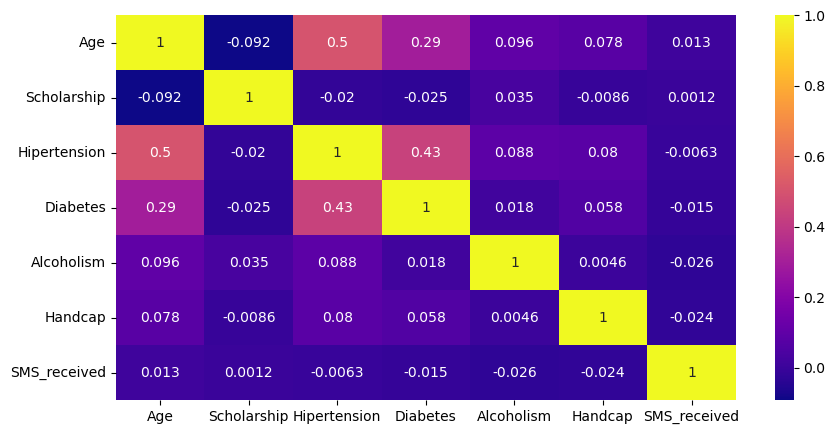

In [7]:
plt.figure(figsize=(10, 5))
corr = numeric_data.corr()

sns.heatmap(corr,
            annot = True,
            cmap = 'plasma')

#Логируем гистограмму
experiment.log_figure(figure=plt)

plt.show()
#график логируется в разделе Images

In [ ]:
#experiment.display()

In [9]:
experiment.end()

COMET INFO: The process of logging environment details (conda environment, git patch) is underway. Please be patient as this may take some time.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : giant_insulation_4049
COMET INFO:     url                   : https://www.comet.com/walde-r/medical-appointment/6597f0bb96b34870a141420338d7157f
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     figures                      : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
CO